In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import pearsonr
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
mpl.rcParams['font.size'] = 14
%config InlineBackend.figure_format = 'retina'

## Data import

In [2]:
#Mrk421 data from feb to may (OLD) with new specifications.
# E above 1TeV
Data1 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_latest.root")
# E below 1TeV
Data2 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_latest.root")

#Mrk421 NEW data Feb'24 to June'24
#E above 1TeV
new_D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_NEW.root")
#E below 1TeV
new_D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_NEW.root")

##lightcurve import
lightC1 = Data1['LightCurve;1']
lightC2 = Data2['LightCurve;1']
LC1=new_D1['LightCurve;1']
LC2=new_D2['LightCurve;1']
########
lcX = LC2.all_members['fX']
lcY = LC2.all_members['fY']
lcEX = LC2.all_members['fEX']
lcEY = LC2.all_members['fEY']
LCX = LC1.all_members['fX']
LCY = LC1.all_members['fY']
LCEX = LC1.all_members['fEX']
LCEY = LC1.all_members['fEY']

#data import
# E above 1TeV
MJD_X = lightC1.all_members['fX']
flux_Y = lightC1.all_members['fY']
MJD_EX = lightC1.all_members['fEX']
flux_EY = lightC1.all_members['fEY']
# E below 1TeV
MJD_x = lightC2.all_members['fX']
flux_y = lightC2.all_members['fY']
MJD_ex = lightC2.all_members['fEX']
flux_ey = lightC2.all_members['fEY']

#for E<1TeV with new specifications
final_mjd=np.concatenate((MJD_x, lcX))
final_Emjd=np.concatenate((MJD_ex, lcEX))
final_flux=np.concatenate((flux_y, lcY))
final_Eflux=np.concatenate((flux_ey, lcEY))
#E>1TeV
finalmjd=np.concatenate((MJD_X, LCX))
finalEmjd=np.concatenate((MJD_EX, LCEX))
finalflux=np.concatenate((flux_Y, LCY))
finalEflux=np.concatenate((flux_EY, LCEY))

iindex = np.array([11, 15])
final_mjd1 = np.delete(final_mjd, iindex)
finalmjd1 = np.delete(finalmjd, iindex)
final_flux1 = np.delete(final_flux, iindex)
finalflux1 = np.delete(finalflux, iindex)
final_Eflux1 = np.delete(final_Eflux, iindex)
final_Emjd1 = np.delete(final_Emjd, iindex)
finalEflux1 = np.delete(finalEflux, iindex)
finalEmjd1 = np.delete(finalEmjd, iindex)

In [3]:
#FERMI data
#light curve data
fermi = np.loadtxt("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/LC_FERMI_no_UL.txt")
fermi_mjd = fermi[:,0]
fermi_emjd = fermi[:,2]
fermi_flux = fermi[:,1]
fermi_eflux = fermi[:,3]
# Fermi SED data at low state
fermi_sed_ls = np.loadtxt("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/fermi_SED_points_lowstate.txt")
fermi_ls_en= fermi_sed_ls[:,1]
fermi_ls_en_low= fermi_sed_ls[:,0]
fermi_ls_en_high= fermi_sed_ls[:,2]
fermi_ls_nuFnu= fermi_sed_ls[:,4]
fermi_ls_nuFnu_low= fermi_sed_ls[:,3]
fermi_ls_nuFnu_high= fermi_sed_ls[:,5]
# Fermi SED data at mid state
fermi_sed_ms = np.loadtxt("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/fermi_SED_points_midstate.txt")
fermi_ms_en= fermi_sed_ms[:,1]
fermi_ms_en_low= fermi_sed_ms[:,0]
fermi_ms_en_high= fermi_sed_ms[:,2]
fermi_ms_nuFnu= fermi_sed_ms[:,4]
fermi_ms_nuFnu_low= fermi_sed_ms[:,3]
fermi_ms_nuFnu_high= fermi_sed_ms[:,5]

In [4]:
#SWIFT-XRT data
xray_els2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux.dat",delimiter=' ', skiprows=2)
xray_egs2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_2to10keVflux.dat",delimiter=' ', skiprows=2)
for col_name in xray_els2kev.columns:
    globals()[f'{col_name}_1'] = xray_els2kev[col_name].to_numpy()

for col_name in xray_egs2kev.columns:
    globals()[f'{col_name}_2'] = xray_egs2kev[col_name].to_numpy()
    
yerr_lower_1 = 10**(midlog_flux_1) - 10**(lowlog_flux_1)
yerr_upper_1 = 10**(highlog_flux_1) - 10**(midlog_flux_1)
yerr_lower_2 = 10**(midlog_flux_2) - 10**(lowlog_flux_2)
yerr_upper_2 = 10**(highlog_flux_2) - 10**(midlog_flux_2)

In [5]:
#fold gamma ray data in the IXPE range with beta parameter fixed
base_direct = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_fold/fixed_beta/"
files_id = ["0430b", "0501b", "0502b", "0504b", "0505b", "0506b", "0510b", "0511b", "0512b", "0513b"]

foldb_files = {}
SED_data = {} 
nu_data = {}
nuFnu_data = {}
EYhigh_data = {}
EYlow_data = {}


for file in files_id:
    file_path = os.path.join(base_direct, f"fold_{file}.root")
    key = f"fold_{file}"
    foldb_files[key] = uproot.open(file_path)
    SED_data[key] = foldb_files[key]['deabsorbed_sed;1']

    nu_data[key] = SED_data[key].all_members['fX']
    nuFnu_data[key] = SED_data[key].all_members['fY']
    EYhigh_data[key] = SED_data[key].all_members['fEYhigh']
    EYlow_data[key] = SED_data[key].all_members['fEYlow']

In [7]:
#All radio data including polarization angle and degree
rad_data = pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/mrk421_radio_data_all.csv", delimiter = ',')
rad_mjd = rad_data['mjd'].values
rad_nu = rad_data['frequency(GHz)'].values
rad_flux = rad_data['flux'].values
rad_eflux = rad_data['error_flux'].values
rad_ePA = rad_data['error_PA'].values
rad_PA = rad_data['PA'].values
rad_PD = rad_data['PD'].values
rad_ePD = rad_data['error_PD'].values

In [13]:
#IXPE data including polarization angle and degree energy 2-8 KeV
ixpe_data = pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/WUSTL_Mrk421_May2024_IXPE_pol_data_clean.csv", delimiter = ',')
ixpe_mjd = ixpe_data['t'].values
ixpe_pa = ixpe_data['PA'].values
ixpe_ePA = ixpe_data['dPA'].values
ixpe_PD = ixpe_data['PD'].values
ixpe_ePD = ixpe_data['dPD'].values

In [15]:
# Optical polarization data

opt_pol_dat = pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/mrk421_hostcorrected_polarisation_data_all.csv", delimiter = ',')
opt_PA = opt_pol_dat['PA'].values
opt_ePA = opt_pol_dat['error_PA'].values
opt_PD = opt_pol_dat['PD'].values
opt_ePD = opt_pol_dat['error_PD'].values
opt_pol_mjd = opt_pol_dat['mjd'].values
telescope = opt_pol_dat['telescope'].values
fltr = opt_pol_dat['band'].values

In [17]:
#optical photometric data
opt_data = pd.read_csv('../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/mrk421_photometry_data_all.csv', delimiter = ',')
opt_xy = opt_data['mjd'].values
opt_mag = opt_data['magnitude'].values
opt_emag = opt_data['error_magnitude'].values
band = opt_data['band'].values
tele = opt_data['telescope'].values
###########################
#F_vega = 3.064e-20 #erg cm-2 s-1 Hz-1

opt_mjd = []

for i in opt_xy:
    if i>= 2400000:
        opt_mjd.append(i - 2400000)
    else:
        opt_mjd.append(i)

opt_mjd = np.array(opt_mjd)

## Separating the data according to filters and telescopes

In [19]:
tele_names = ['LX200', 'Perkins', 'NOT', 'CAFOS', 'KANATA']
filter_bands = ['R', 'B', 'V', 'I']
opt_phot_data = {}
opt_pol_data = {}

#seperating the optical photometric data according to the telescope only in R band for now.
for tele_name in tele_names:
    opt_phot_data[tele_name] = {}  # Initialize dictionary for each telescope
    # Find indices where the telescope name matches
    tele_indices = np.where(tele == tele_name)[0]
    
    # loop will save the data from current telescope in loop in the following list
    current_tele_mag = opt_mag[tele_indices]
    current_tele_err_mag = opt_emag[tele_indices]
    current_tele_opt_mjd = opt_mjd[tele_indices]
    current_band_tele = band[tele_indices]

    for bands in filter_bands:
    # Find indices where the band is 'R' within the current telescope's data
        band_indices = np.where(current_band_tele == bands)[0]
        # Check if there are any data points for the current band
        if len(band_indices) > 0:
        # Extract the final filtered data
            opt_phot_data[tele_name][bands] = {
                f'{bands}_mag': current_tele_mag[band_indices],
                f'{bands}_err_mag': current_tele_err_mag[band_indices],
                f'{bands}_opt_mjd': current_tele_opt_mjd[band_indices]
            }

#################################################################################################

#seperating the optical polarization data according to the telescope only in R band for now.
for tele_name in tele_names:
    # Find indices where the telescope name matches
    tele_index = np.where(telescope == tele_name)[0]

#Saving the data matched with particular telescope running currently in the loop in a sub dictionary named by telescope name in the dictionary named as opt_pol_data
    opt_pol_data[tele_name] = {
        'PA': opt_PA[tele_index],
        'ePA': opt_ePA[tele_index],
        'PD': opt_PD[tele_index],
        'ePD': opt_ePD[tele_index],
        'mjd': opt_pol_mjd[tele_index]
    }

In [21]:
folder_path = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/SEDs/"

files = os.listdir(folder_path)
sed_data = {}

for file in files:

    num_part = file.split("_sed.dat")[0]

    var_name = f"sed_{num_part}"

    file_path = os.path.join(folder_path, file)

    data = np.loadtxt(file_path, delimiter=" " )
    globals()[var_name] = data.T
    #sed_data[var_name] = data.T

In [23]:
#SWIFT-XRT data to get MJD and binID
xray_els2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux.dat",delimiter=' ', skiprows=2)

In [25]:
for col_name in xray_els2kev.columns:
    globals()[f'{col_name}'] = xray_els2kev[col_name].to_numpy()

In [27]:
#photometric data averaging over a day
def group_mjds_and_flux(mjds, fluxes, errors):
    grouped_data = {}
    for mjd, flux, error in zip(mjds, fluxes, errors):
        day = int(mjd)
        if day not in grouped_data:
            grouped_data[day] = []
        grouped_data[day].append((mjd, flux, error))
    return grouped_data

def calculate_daily_averages(mjds, fluxes, errors):
    grouped_data = group_mjds_and_flux(mjds, fluxes, errors)
    mjd_average = []
    flux_average = []
    err_flux_average = []
    for day_data in grouped_data.values():
        mjd_values = [data[0] for data in day_data]
        flux_values = [data[1] for data in day_data]
        err_flux_values = [data[2] for data in day_data]
        mjd_average.append(np.mean(mjd_values))
        flux_average.append(np.mean(flux_values))
        err_flux_average.append(np.mean(err_flux_values))
    return np.array(mjd_average), np.array(flux_average), np.array(err_flux_average)

phot_dat_average = {}

for t in tele_names:
    if t in opt_phot_data:
        phot_dat_average[t] = {}  # new dictionary for the telescope inside original dictionary
        for b in filter_bands:
            if b in opt_phot_data[t]:
                data = opt_phot_data[t][b]
                mjd_key = f'{b}_opt_mjd'
                mag_key = f'{b}_mag'
                err_mag_key = f'{b}_err_mag'

                if mjd_key in data and mag_key in data and err_mag_key in data:
                    phot_mjds = data[mjd_key]
                    phot_fluxes = data[mag_key]
                    phot_errors = data[err_mag_key]
            
                    if len(phot_mjds) > 0:  # Check if there is data for the band
                        mjd_avg, flux_avg, err_flux_avg = calculate_daily_averages(phot_mjds, phot_fluxes, phot_errors)
                        phot_dat_average[t][b] = {
                            'mjd_average': mjd_avg,
                            'flux_average': flux_avg,
                            'err_flux_average': err_flux_avg
                        }
                    else:
                        print(f"Warning: No data found for '{b}' band for telescope '{t}'. Skipping.")
                else:
                    print(f"Warning: Data keys ('{mjd_key}', '{mag_key}', '{err_mag_key}') not found for band '{b}' in telescope '{t}'. Skipping.")
            else:
                print(f"Warning: '{b}' band data keys not found in 'opt_phot_data' for '{t}'. Skipping.")
    else:
        print(f"Warning: Data not found in 'opt_phot_data' for '{t}'. Skipping.")

        
####################################################################################################

In [29]:
h = 6.626e-34
c = 2.997e8
# To convert frequency to energy in GeV 
XRT_fact = h / 1.60218e-10
# To convert flux in Jy to ergs/cm^2/s^1/Hz
rad_fact = h*1e9*10e-23/1.602e-10
#
R_wl = 641.7e-9 # in metres central wavelength of R band
V_wl = 545.8e-9
B_wl = 438.1e-9
I_wl = 798e-9
R_vega = 3.064e-20 #ergscm^-2 s^-1 Hz^-1
B_vega = 4.063e-20
I_vega = 2.416e-20
V_vega = 3.636e-20
R_nu = np.array(c/R_wl)
V_nu = c/V_wl
I_nu = c/I_wl
B_nu = c/B_wl
#host flux 8 mJy subtract from R band
# error in optical flux calculated from magnitude
#f_obs = 10**(-0.4*mag)*f_vega
#err_f_obs = 10**(-0.4*mag)*f_vega*(0.4*err_mag)/1e-23

In [31]:
#polarization data averaging over a day
def group_mjd_and_flux(mjd, pol_ang, epol_ang, pol_deg, epol_deg):
    group_data = {}
    for mjd, PA, ePA, PD, ePD in zip(mjd, pol_ang, epol_ang, pol_deg, epol_deg):
        day = int(mjd)
        if day not in group_data:
            group_data[day] = []
        group_data[day].append((mjd, PA, ePA, PD, ePD))
    return group_data
    
def calculate_daily_average(mjd, pol_ang, epol_ang, pol_deg, epol_deg):
    group_data = group_mjd_and_flux(mjd, pol_ang, epol_ang, pol_deg, epol_deg)
    mjd_average = []
    PA_average = []
    ePA_average = []
    PD_average = []
    ePD_average = []
    for day_dat in group_data.values():
        mjd_values = [data[0] for data in day_dat]
        PA_values = [data[1] for data in day_dat]
        ePA_values = [data[2] for data in day_dat]
        PD_values = [data[3] for data in day_dat]
        ePD_values = [data[4] for data in day_dat]
        mjd_average.append(np.mean(mjd_values))
        PA_average.append(np.mean(PA_values))
        ePA_average.append(np.mean(ePA_values))
        PD_average.append(np.mean(PD_values))
        ePD_average.append(np.mean(ePD_values))
    return np.array(mjd_average), np.array(PA_average), np.array(ePA_average), np.array(PD_average), np.array(ePD_average)
pol_data_average = {}

for te in tele_names:
    if te in opt_pol_data:
        dat = opt_pol_data[te]
        pol_mjds = dat['mjd']
        pol_PA = dat['PA']
        pol_ePA = dat['ePA']
        pol_PD = dat['PD']
        pol_ePD = dat['ePD']

        mjd_avg, PA_avg, ePA_avg, PD_avg, ePD_avg = calculate_daily_average(pol_mjds, pol_PA, pol_ePA, pol_PD, pol_ePD)

        pol_data_average[te] = {
            'mjd_avrg': mjd_avg,
            'PA_avrg': PA_avg,
            'ePA_avrg': ePA_avg,
            'PD_avrg': PD_avg,
            'ePD_avrg': ePD_avg
        }
    else:
        print(f"Warning: Data not found in 'telescope_data' for '{te}'. Skipping.")

In [33]:
ixpe_PA = []

for i in ixpe_pa:
    if i < 0:
        ixpe_PA.append(i+180)
    else:
        ixpe_PA.append(i)



In [37]:
N_par_value_mcmc = np.array([0.04164083745742519, 0.037869851591826154, 0.02296374266535839, 0.03340329981183439, 0.04315067451079581, 0.024847752513866454, 0.148666284278146, 0.4595315323185451, 0.4639794787023388, 0.4232441492233122])
N_upper_err_mcmc = np.array([0.006548310381066923, 0.005029069016663952, 0.005745126848957994, 0.0023374661136780425, 0.006286139623260717, 0.002525422851260433, 0.010412427981871558, 0.025908455179789236, 0.024807656472508655, 0.03234014753940523])
N_lower_err_mcmc = np.array([0.006695187749601102, 0.004984197239886544, 0.007212887834134981, 0.0025862913223251814, 0.00587470834569357, 0.002510071762224453, 0.010481976713022173, 0.03752910287542521, 0.03615146130833469, 0.03178817607069828])
B_par_value_mcmc = np.array([0.13265168378118405, 0.13582242683737394, 0.1386621302793371, 0.08900301537876054, 0.1419189082245826, 0.11730837826172127, 0.18878747189974, 0.2965679347353923, 0.3609198204834906, 0.24802718050296518])
B_upper_err_mcmc = np.array([0.023667771629245576, 0.02175484700987282, 0.030102040879640884, 0.012538752508183662, 0.016462214006454784, 0.01572304522342005, 0.017847964795914772, 0.035643033116335765, 0.03197187779540017, 0.027501057089413583])
B_lower_err_mcmc = np.array([0.024031376234672983, 0.023698731297960685, 0.02783388252312123, 0.010131617247359531, 0.02107904551018759, 0.014675990105453354, 0.017250184488481868, 0.027806070926831905, 0.02810023708642695, 0.027016772110116827])
P_par_value_mcmc = np.array([2.921164674237182, 2.908205390184278, 3.308098725018988, 2.6289854189345405, 3.0219879922546293, 2.7052867010797366, 2.0620440847817996, 2.2943006348185935, 2.5100451796414918, 2.064300581793321])
P_upper_err_mcmc = np.array([0.2779382507653554, 0.2569725314654776, 0.23285573992864972, 0.20186025418271702, 0.32394323337937836, 0.22471248887025785, 0.16220767765104416, 0.2566890381138256, 0.1639271226894934, 0.20764486617852018])
P_lower_err_mcmc = np.array([0.31403370516544094, 0.2907105733337514, 0.3730281455041391, 0.2134153720962968, 0.28593265104720667, 0.20917693059199038, 0.16861616215216846, 0.21273494936100157, 0.16440001152779082, 0.20884064670002989])
compact_R = np.array([7.65444928e+15, 7.70430248e+15 ,1.02039892e+16 ,1.06131062e+16,
 7.68919923e+15 ,1.02261059e+16, 4.13351465e+15, 2.21562977e+15, 2.20329644e+15 ,2.61209673e+15])

In [41]:
PB_r_value, PB_p_value = pearsonr(B_par_value_mcmc, P_par_value_mcmc)
BN_r_value, BN_p_value = pearsonr(N_par_value_mcmc, B_par_value_mcmc)
print(PB_r_value, PB_p_value)
print(BN_r_value, BN_p_value)

-0.5409534344948923 0.1063814103074612
0.9505216676660324 2.469539903842382e-05


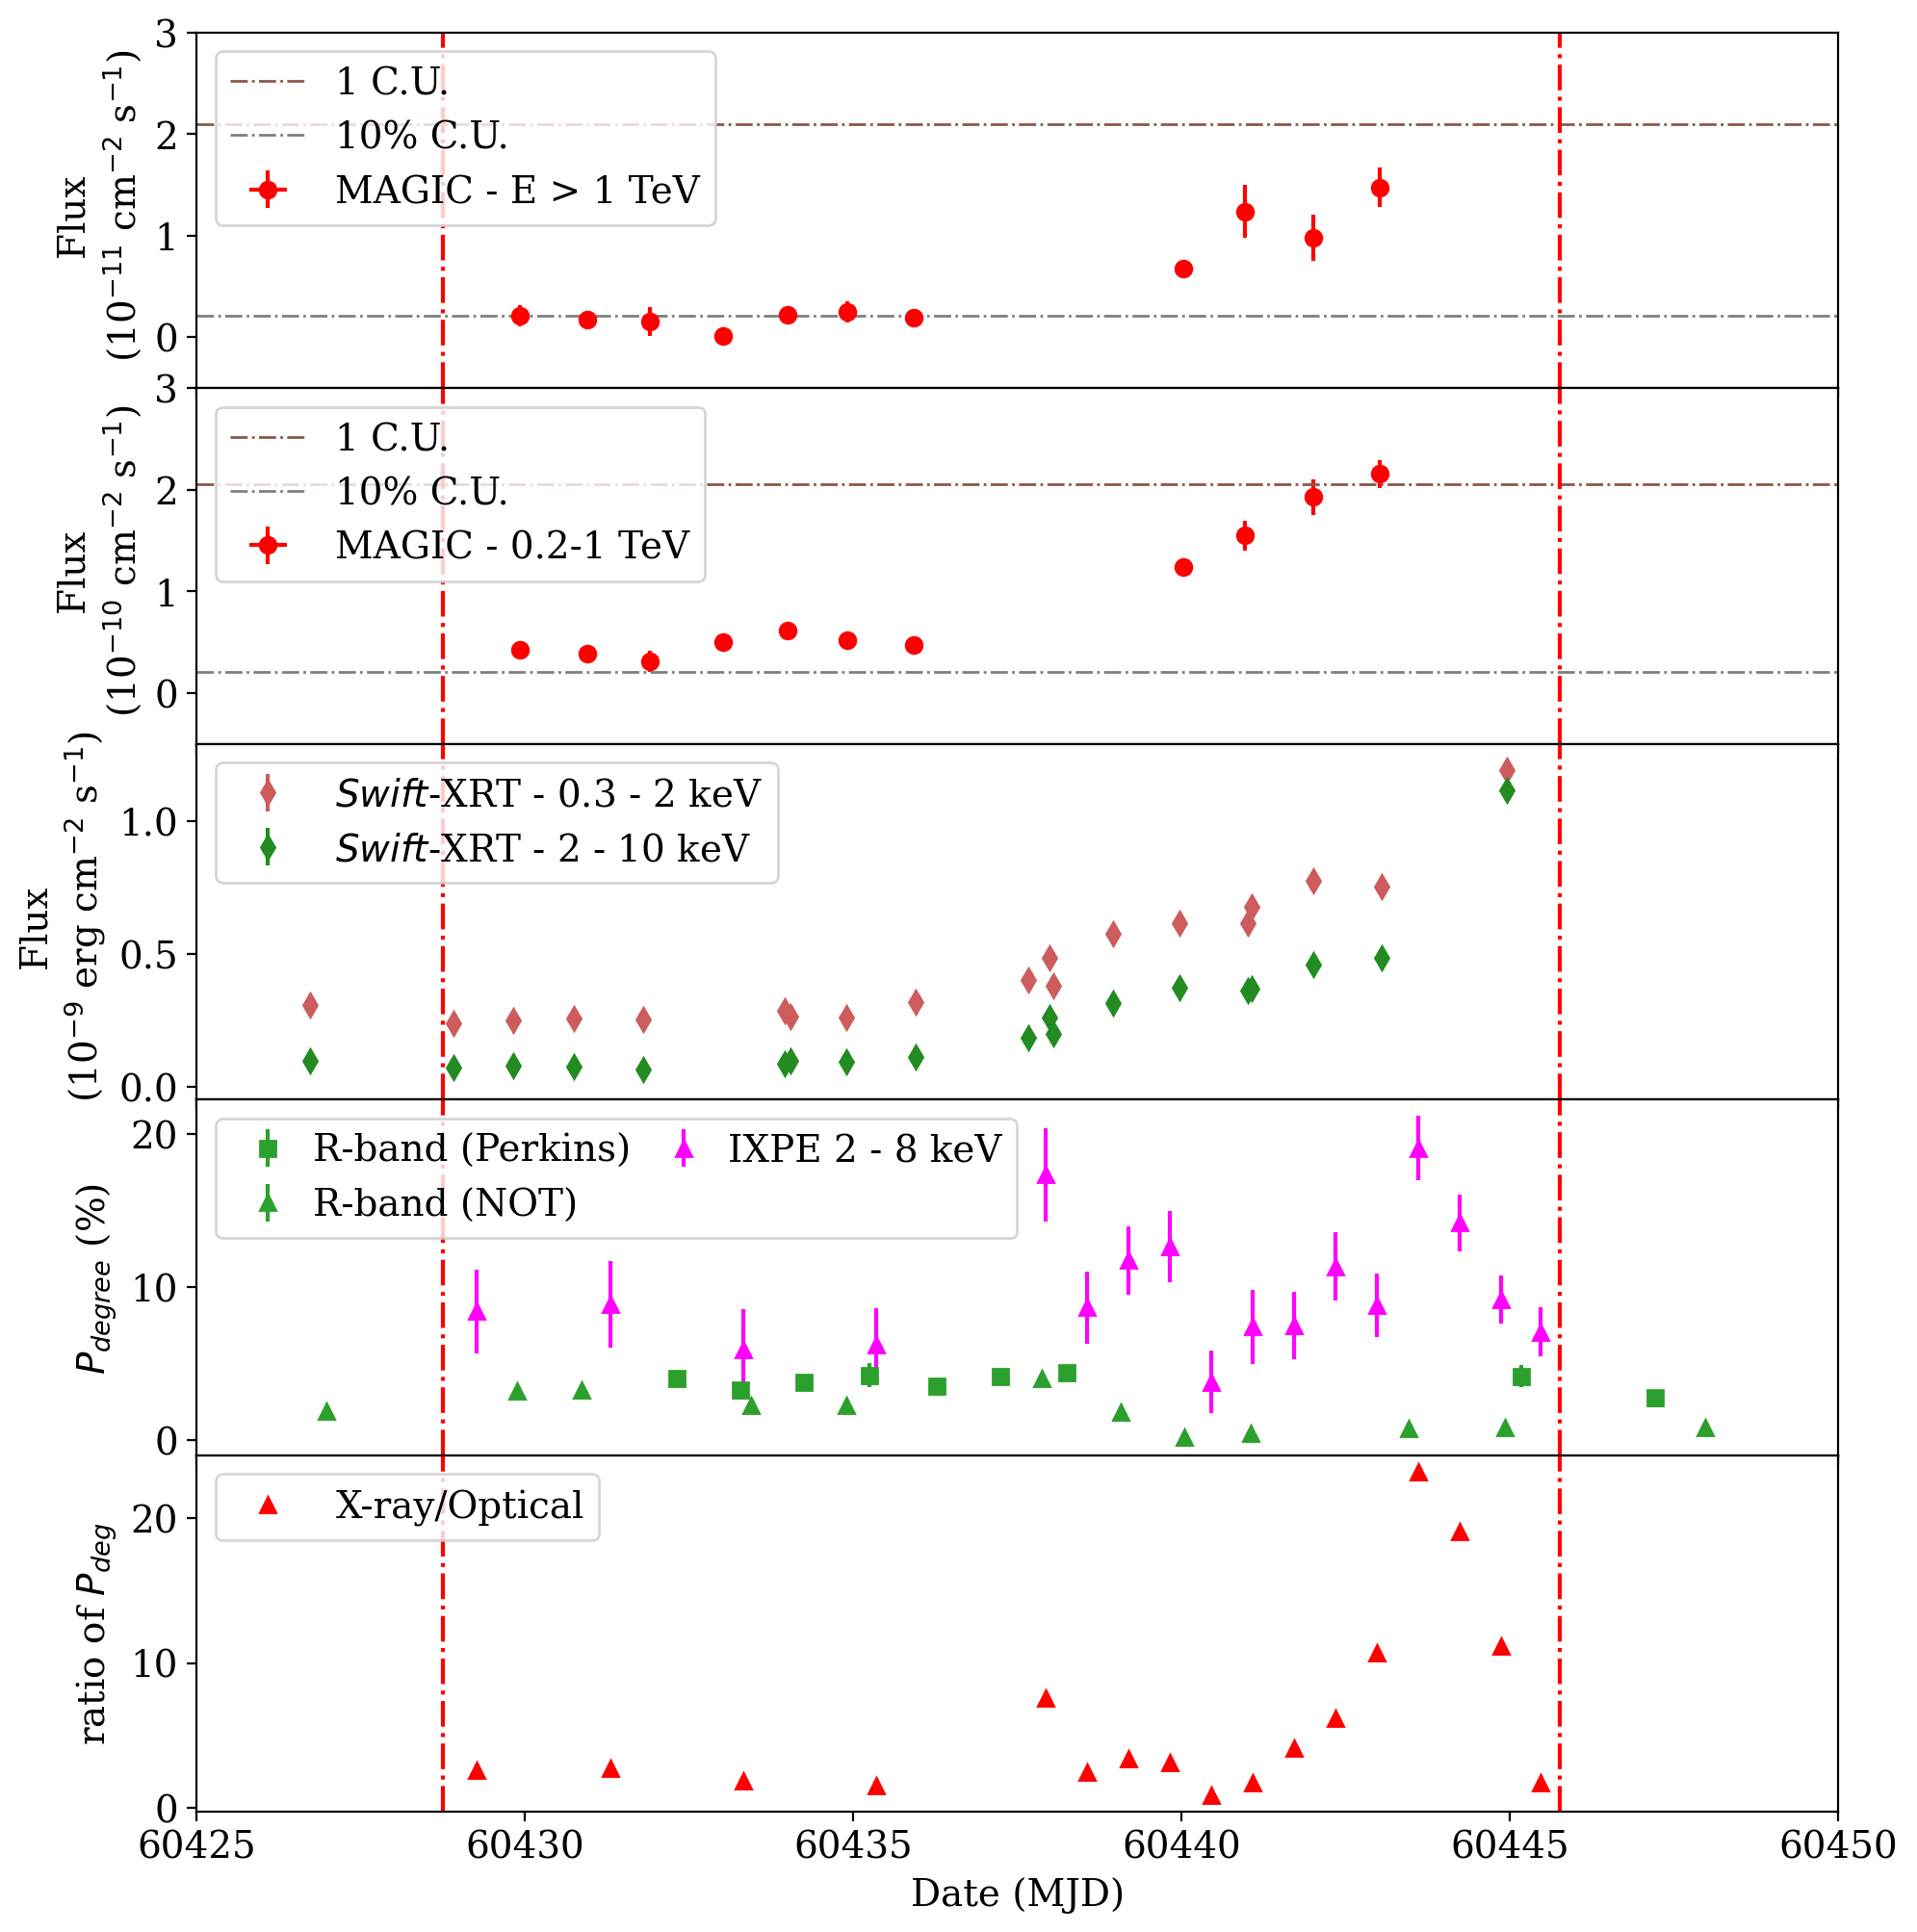

In [175]:
fig, axs = plt.subplots(5, 1, figsize=(11,12), sharex=True)
fig.subplots_adjust(hspace=0.00)
#########################################################
#MAGIC - E > 1 TeV
axs[0].errorbar(finalmjd1, finalflux1/10e-12, yerr=finalEflux1/10e-12, xerr=finalEmjd1, label="MAGIC - E > 1 TeV", fmt='o', color = 'red')
axs[0].axhline(y=2.097e-11/10e-12, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[0].axhline(y=2.097e-12/10e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
axs[0].axvline(x=60428.75, color='r', linestyle='-.')
axs[0].axvline(x=60445.75, color='r', linestyle='-.')
axs[0].set_ylim(-0.5, 3)
axs[0].set_ylabel('Flux \n (10$^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].set_xlim(60425, 60450)
axs[0].legend(loc='upper left')
#axs[0].set_title('Light Curve of Mrk 421')
#axs[1].grid(True)

#############################################
#MAGIC - 0.2 < E < 1 TeV 
axs[1].errorbar(final_mjd1, final_flux1/10e-11, yerr=final_Eflux1/10e-11, xerr=final_Emjd1, label="MAGIC - 0.2-1 TeV", fmt='o', color = 'red')
axs[1].axhline(y=20.56e-11/10e-11, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[1].axhline(y=20.56e-12/10e-11, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
axs[1].set_ylim(-0.5, 3)
axs[1].axvline(x=60428.75, color='r', linestyle='-.')
axs[1].axvline(x=60445.75, color='r', linestyle='-.')
axs[1].set_ylabel('Flux \n (10$^{-10}$ cm$^{-2}$ s$^{-1}$)')
axs[1].set_xlim(60425, 60450)
axs[1].legend(loc='upper left')

##################################################
#SWIFT-XRT - 0.3Kev< E <2KeV and 2Kev< E <10KeV
axs[2].errorbar(MJD_1, 10**(midlog_flux_1)/10e-10, yerr=[(yerr_lower_1), (yerr_upper_1)], fmt='d', label = r'$\mathit{Swift}$-XRT - 0.3 - 2 keV', color = 'indianred')
axs[2].errorbar(MJD_2, 10**(midlog_flux_2)/10e-10, yerr=[(yerr_lower_2), (yerr_upper_2)], fmt='d', label = r'$\mathit{Swift}$-XRT - 2 - 10 keV', color = 'Forestgreen')
axs[2].axvline(x=60428.75, color='r', linestyle='-.')
axs[2].axvline(x=60445.75, color='r', linestyle='-.')
axs[2].set_ylabel('Flux \n (10$^{-9}$ erg cm$^{-2}$ s$^{-1}$)')
axs[2].set_xlim(60425, 60450)
axs[2].legend(loc='upper left')
############################################################
axs[3].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PD_avrg'], yerr= pol_data_average['Perkins']['ePD_avrg'], fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[3].errorbar(pol_data_average['NOT']['mjd_avrg'], pol_data_average['NOT']['PD_avrg'], yerr= pol_data_average['NOT']['ePD_avrg'], fmt = '^', label = 'R-band (NOT)', color = 'C2')
axs[3].errorbar(ixpe_mjd, ixpe_PD*100, yerr= ixpe_ePD*100, fmt = '^', label = 'IXPE 2 - 8 keV', color = 'magenta')
#axs[6].errorbar(rad_mjd, rad_PD, yerr = rad_ePD, fmt = 'o', label = 'radio', color = 'purple')
axs[3].axvline(x=60428.75, color='r', linestyle='-.')
axs[3].axvline(x=60445.75, color='r', linestyle='-.')
axs[3].set_ylabel('$P_{degree}$ (%)')
axs[3].set_xlim(60425, 60450)
axs[3].legend(loc='upper left', ncol=2, columnspacing=0.4, handletextpad=0.2)
#########################################################
axs[4].plot(ixpe_mjd, l3, '^', color='red', label = 'X-ray/Optical')
#axs43].plot(MJD_swift_xrt, l3, 'o')
axs[4].set_ylabel('ratio of $P_{deg}$')
axs[4].set_xlabel('Date (MJD)')
axs[4].axvline(x=60428.75, color='r', linestyle='-.')
axs[4].axvline(x=60445.75, color='r', linestyle='-.')
axs[4].legend(loc='upper left')

plt.savefig('ratio_pol_degree_flux.png')

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_6053/3953096590.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('polarization angle ($\degree$)')
/tmp/ipykernel_6053/3953096590.py:18: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('polarization angle ($\degree$)')


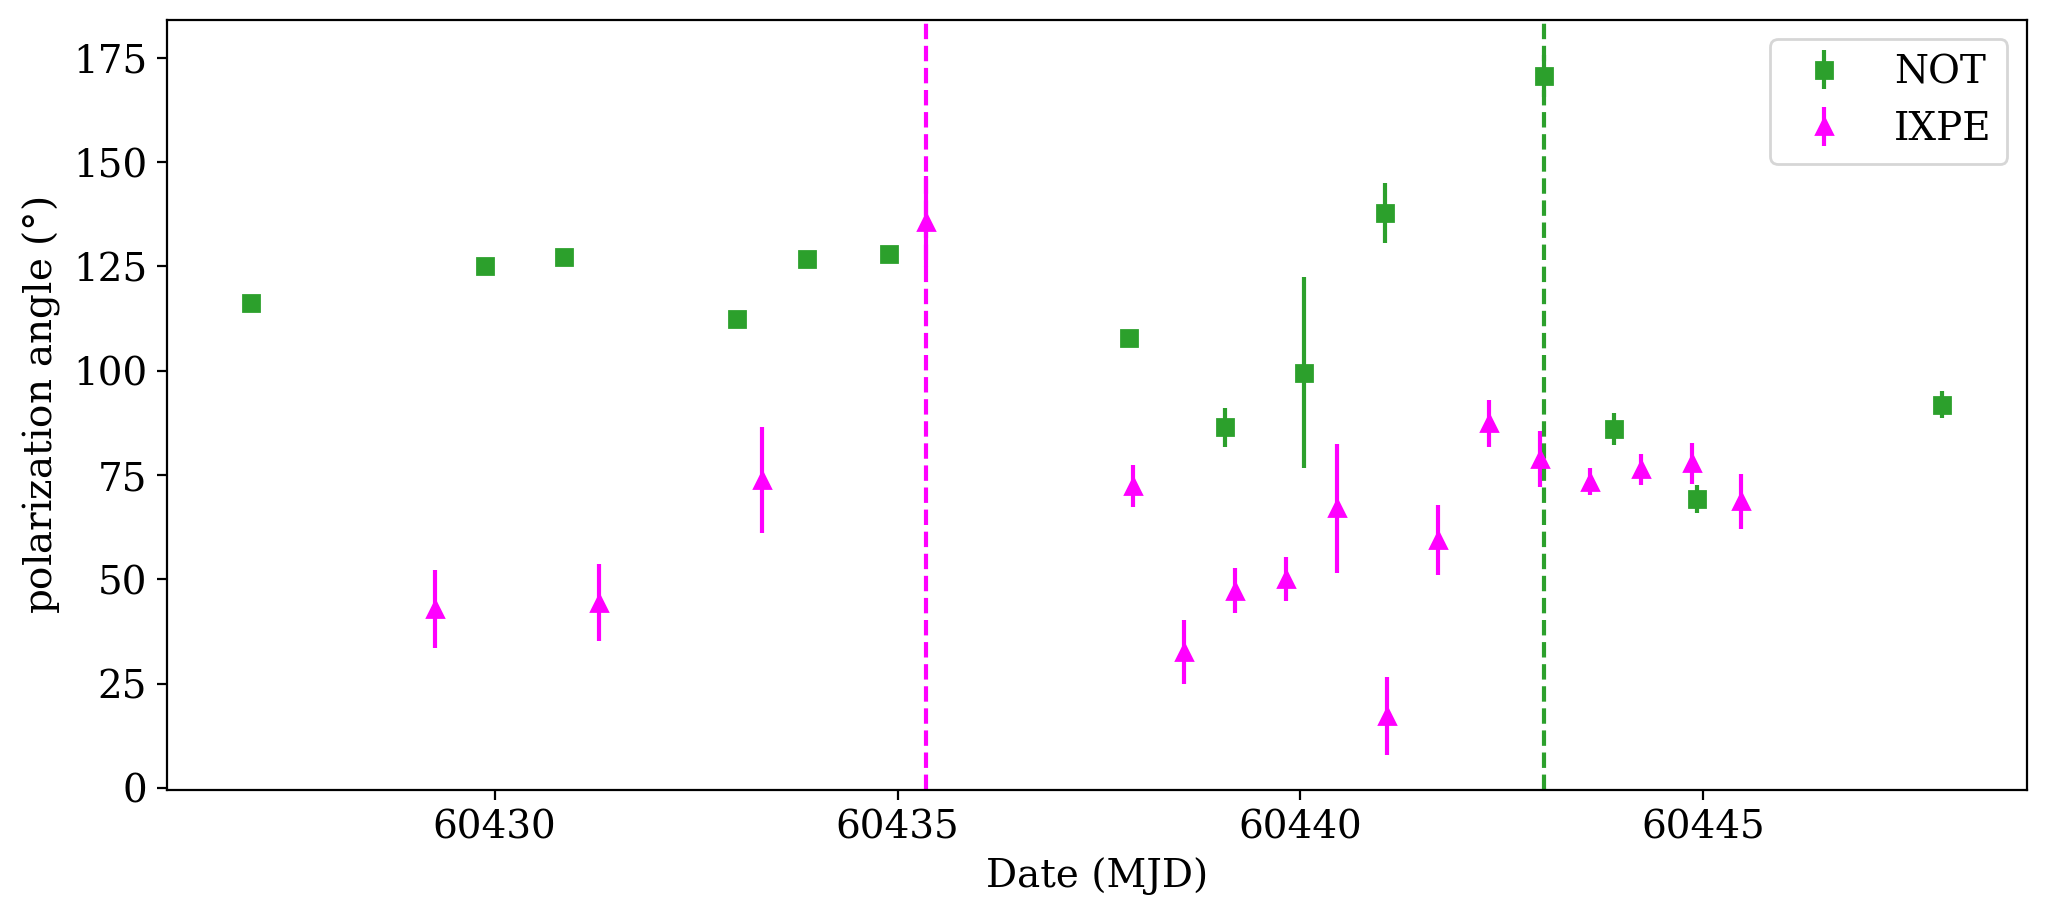

In [37]:
plt.figure(figsize=(12, 5))
plt.errorbar(opt_pol_data['NOT']['mjd'], opt_pol_data['NOT']['PA'], yerr= opt_pol_data['NOT']['ePA'], fmt='s', color ='C2', label ='NOT')
plt.errorbar(ixpe_mjd, ixpe_PA, yerr=ixpe_ePA, fmt='^', color = 'magenta', label = 'IXPE')

# Find indices of maxima
ixpe_idx_max = np.argmax(ixpe_PA)
opt_idx_max = np.argmax(opt_pol_data['NOT']['PA'])

# Find corresponding MJD dates
ixpe_mjd_max = ixpe_mjd[ixpe_idx_max]
opt_mjd_max = opt_pol_data['NOT']['mjd'][opt_idx_max]

# Plot vertical lines at these MJD values
plt.axvline(x=ixpe_mjd_max, color='magenta', linestyle='--')
plt.axvline(x=opt_mjd_max, color='C2', linestyle='--')
plt.ylabel('polarization angle ($\degree$)')
plt.xlabel('Date (MJD)')
plt.ylabel('polarization angle ($\degree$)')
plt.legend(loc='best')
plt.savefig('pol_angle_xray_optical.png')
#print(np.max(ixpe_PA), np.max(opt_pol_data['NOT']['PA']))

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_4511/691328529.py:13: SyntaxWarning: invalid escape sequence '\d'
  axs[0].set_ylabel('Polarization \n angle ($\degree$)')


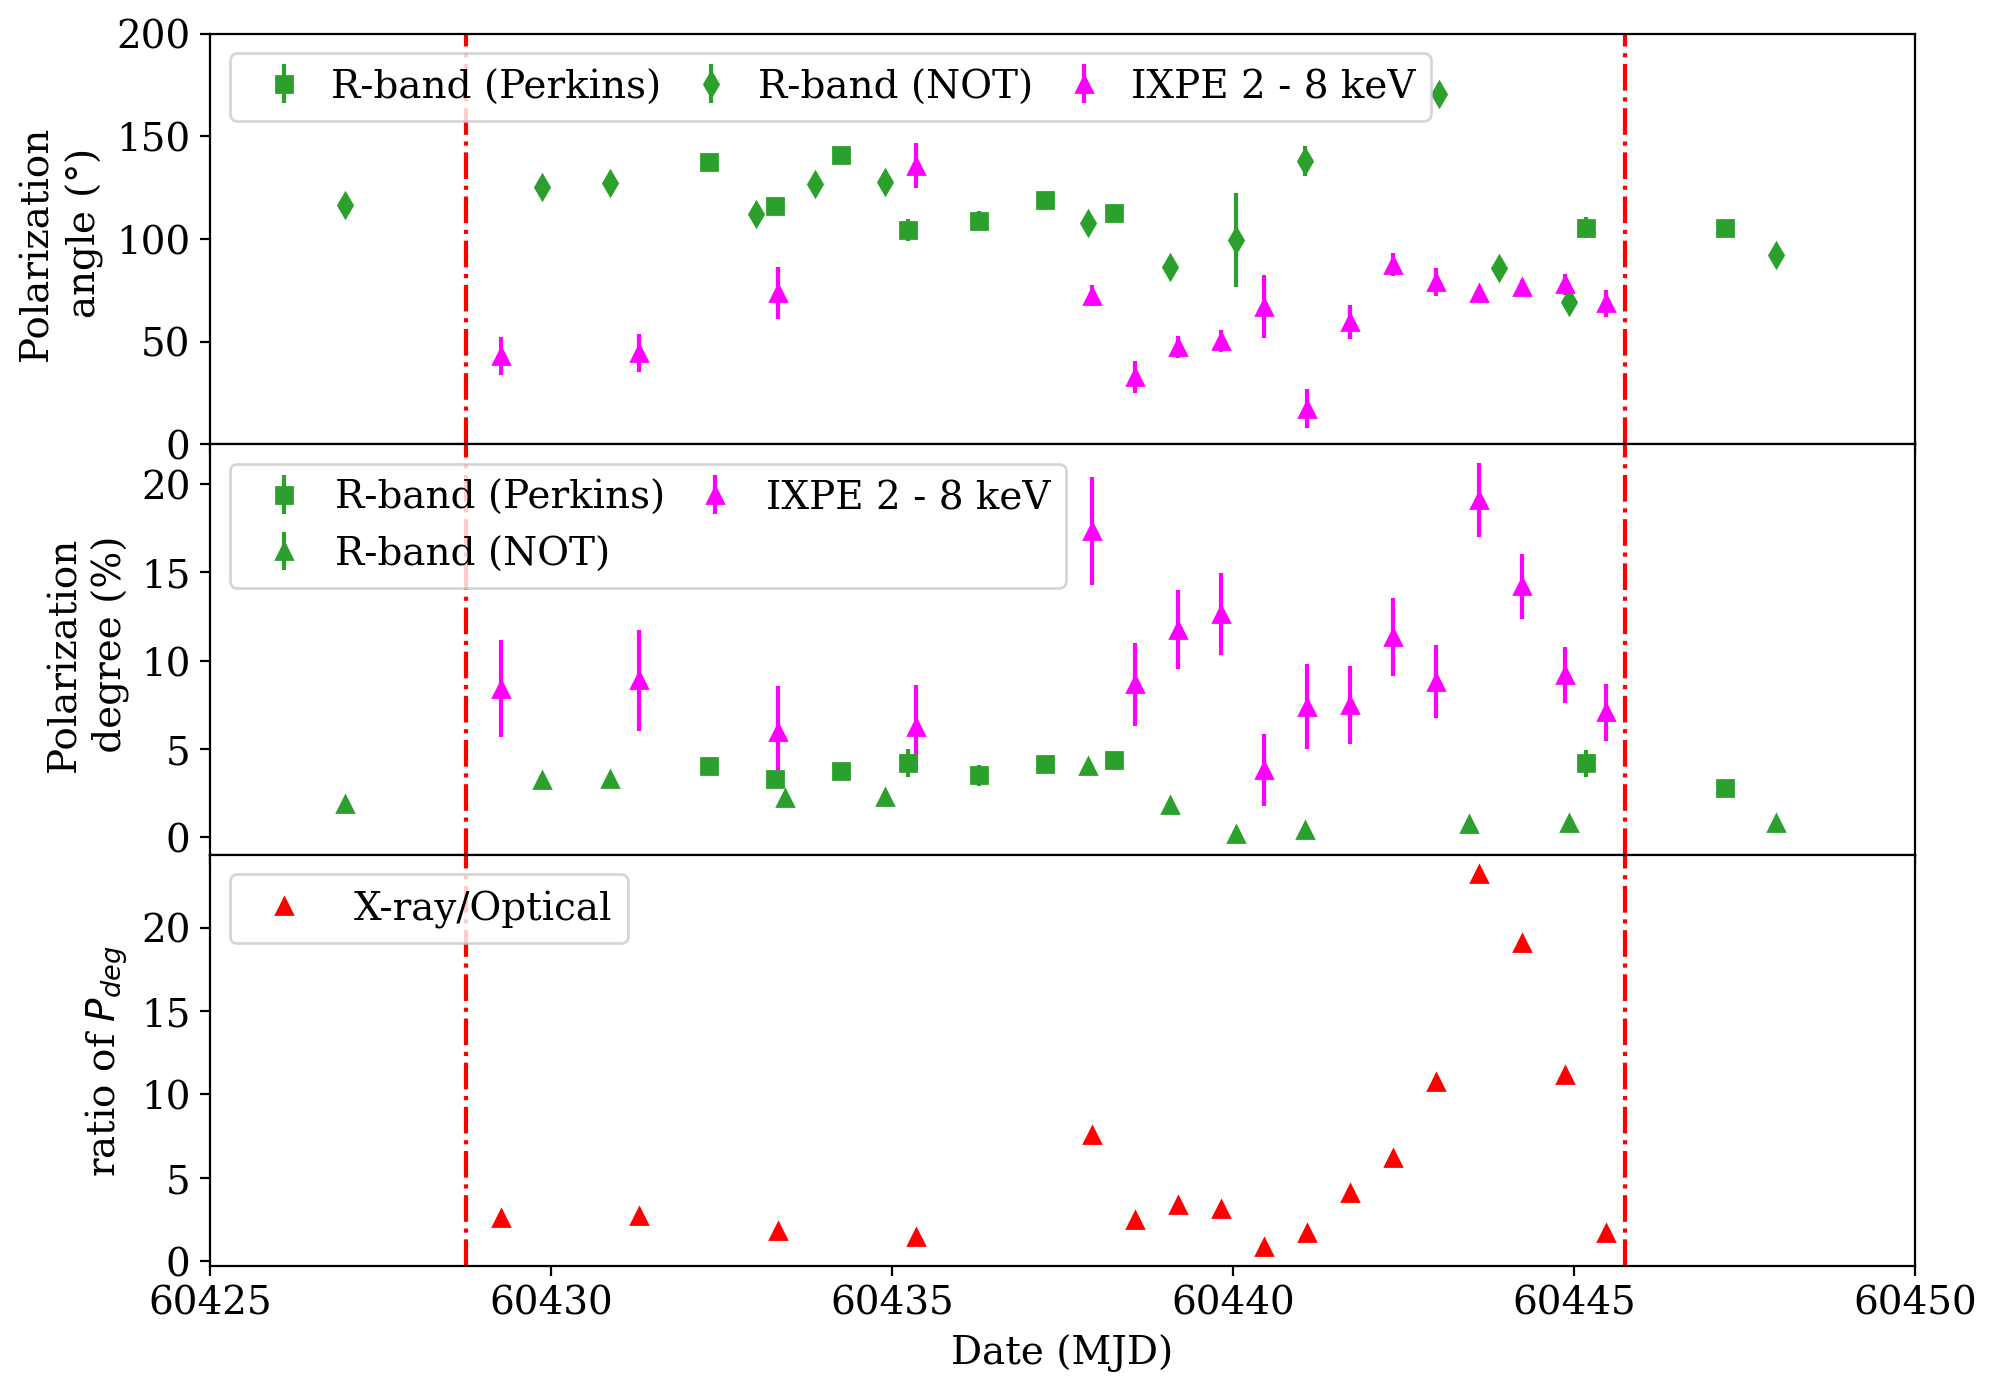

In [155]:
fig, axs = plt.subplots(3, 1, figsize=(11,8), sharex=True)
fig.subplots_adjust(hspace=0.00)
#########################################################
#polarization angle data from optical, IXPE and radio telescopes
axs[0].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PA_avrg']+180, yerr= pol_data_average['Perkins']['ePA_avrg'], fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[0].errorbar(opt_pol_data['NOT']['mjd'], opt_pol_data['NOT']['PA'], yerr= opt_pol_data['NOT']['ePA'], fmt = 'd', label = 'R-band (NOT)', color = 'C2')
#axs[7].errorbar(pol_data_average['LX200']['mjd_avrg'], pol_data_average['LX200']['PA_avrg'], yerr= pol_data_average['LX200']['ePA_avrg'], fmt = 'o', label = 'LX200-R-band', color = 'C2')
axs[0].errorbar(ixpe_mjd, ixpe_PA, yerr = ixpe_ePA, fmt = '^', label = 'IXPE 2 - 8 keV', color = 'magenta')
#axs[7].errorbar(rad_mjd, rad_PA, yerr = rad_ePA, fmt = 'o', label = 'radio', color = 'purple')
axs[0].set_ylim(0,200)
axs[0].axvline(x=60428.75, color='r', linestyle='-.')
axs[0].axvline(x=60445.75, color='r', linestyle='-.')
axs[0].set_ylabel('Polarization \n angle ($\degree$)')
#axs[7].set_xlabel('Date (MJD)')
axs[0].legend(loc='upper left', ncol=3, columnspacing=0.3, handletextpad=0.2)
#axs[6].grid(True)
################################################
#polarization degree data from optical, IXPE and radio telescopes
axs[1].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PD_avrg'], yerr= pol_data_average['Perkins']['ePD_avrg'], fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[1].errorbar(pol_data_average['NOT']['mjd_avrg'], pol_data_average['NOT']['PD_avrg'], yerr= pol_data_average['NOT']['ePD_avrg'], fmt = '^', label = 'R-band (NOT)', color = 'C2')
axs[1].errorbar(ixpe_mjd, ixpe_PD*100, yerr= ixpe_ePD*100, fmt = '^', label = 'IXPE 2 - 8 keV', color = 'magenta')
#axs[6].errorbar(rad_mjd, rad_PD, yerr = rad_ePD, fmt = 'o', label = 'radio', color = 'purple')
axs[1].axvline(x=60428.75, color='r', linestyle='-.')
axs[1].axvline(x=60445.75, color='r', linestyle='-.')
axs[1].set_ylabel('Polarization \n degree (%)')
axs[1].set_xlim(60425, 60450)
axs[1].legend(loc='upper left', ncol=2, columnspacing=0.3, handletextpad=0.3)
#########################################################
axs[2].plot(ixpe_mjd, l3, '^', color='red', label = 'X-ray/Optical')
#axs[3].plot(MJD_swift_xrt, l3, 'o')
axs[2].set_ylabel('ratio of $P_{deg}$')
axs[2].set_xlabel('Date (MJD)')
axs[2].axvline(x=60428.75, color='r', linestyle='-.')
axs[2].axvline(x=60445.75, color='r', linestyle='-.')
axs[2].legend(loc='upper left')
plt.savefig('pol_degree_angle_with ratio.png')

## Light curve of IXPE window

<>:113: SyntaxWarning: invalid escape sequence '\d'
<>:113: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_4511/2001620797.py:113: SyntaxWarning: invalid escape sequence '\d'
  axs[7].set_ylabel('$P_{angle}$ ($\degree$)')


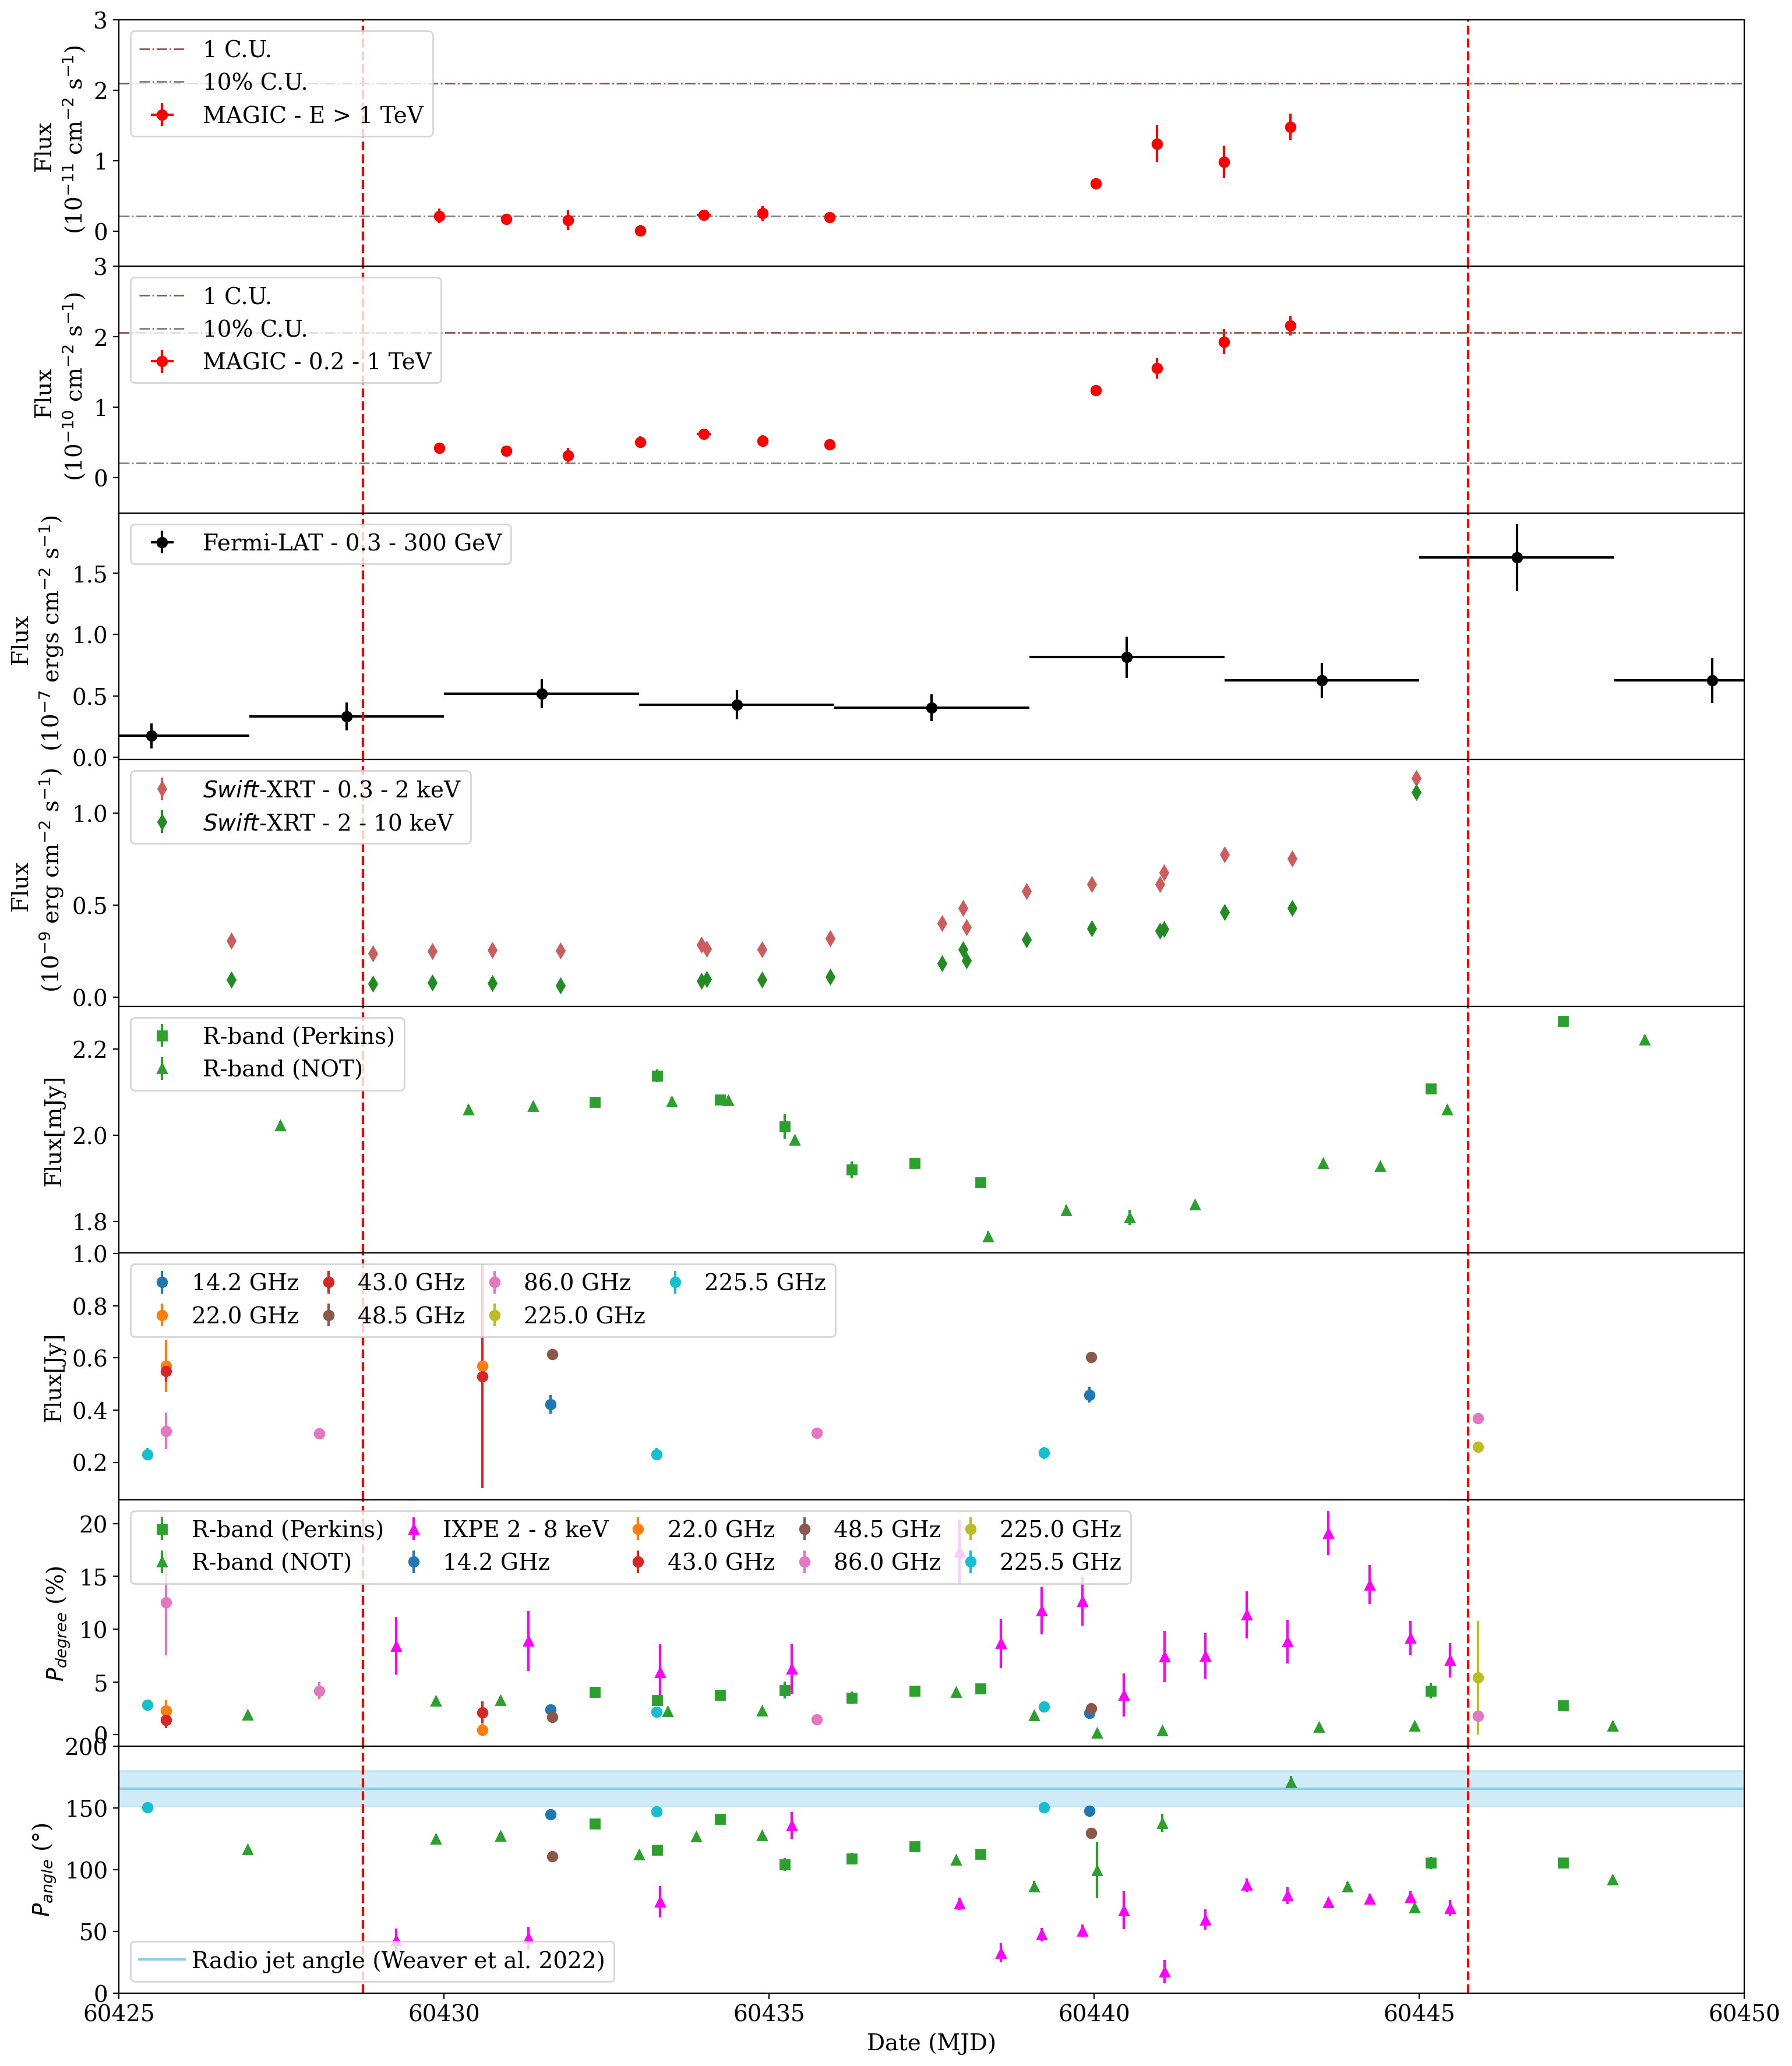

In [219]:
fig, axs = plt.subplots(8, 1, figsize=(18,22), sharex=True)
fig.subplots_adjust(hspace=0.00)
#########################################################
#MAGIC - E > 1 TeV
axs[0].errorbar(finalmjd1, finalflux1/10e-12, yerr=finalEflux1/10e-12, xerr=finalEmjd1, label="MAGIC - E > 1 TeV", fmt='o', color = 'red')
axs[0].axhline(y=2.097e-11/10e-12, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[0].axhline(y=2.097e-12/10e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
axs[0].axvline(x=60428.75, color='r', linestyle='--')
axs[0].axvline(x=60445.75, color='r', linestyle='--')
axs[0].set_ylim(-0.5, 3)
axs[0].set_ylabel('Flux \n (10$^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].set_xlim(60425, 60450)
axs[0].legend(loc='upper left')
#axs[0].set_title('Light Curve of Mrk 421')
#axs[1].grid(True)

#############################################
#MAGIC - 0.2 < E < 1 TeV 
axs[1].errorbar(final_mjd1, final_flux1/10e-11, yerr=final_Eflux1/10e-11, xerr=final_Emjd1, label="MAGIC - 0.2 - 1 TeV", fmt='o', color = 'red')
axs[1].axhline(y=20.56e-11/10e-11, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[1].axhline(y=20.56e-12/10e-11, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
axs[1].set_ylim(-0.5, 3)
axs[1].axvline(x=60428.75, color='r', linestyle='--')
axs[1].axvline(x=60445.75, color='r', linestyle='--')
axs[1].set_ylabel('Flux \n (10$^{-10}$ cm$^{-2}$ s$^{-1}$)')
axs[1].set_xlim(60425, 60450)
axs[1].legend(loc='upper left')

#axs[0].grid(True)
##################################################
#FERMI - 0.3< E < 300 GeV
axs[2].errorbar(fermi_mjd, fermi_flux/1e-7, yerr=fermi_eflux/1e-7, xerr=fermi_emjd, label="Fermi-LAT - 0.3 - 300 GeV", fmt='o', color = 'black')
axs[2].axvline(x=60428.75, color='r', linestyle='--')
axs[2].axvline(x=60445.75, color='r', linestyle='--')
axs[2].set_ylabel('Flux \n (10$^{-7}$ ergs cm$^{-2}$ s$^{-1}$)')
axs[2].set_xlim(60425, 60450)
axs[2].legend(loc='upper left')
#axs[1].grid(True)
##################################################
#SWIFT-XRT - 0.3Kev< E <2KeV and 2Kev< E <10KeV
axs[3].errorbar(MJD_1, 10**(midlog_flux_1)/10e-10, yerr=[(yerr_lower_1), (yerr_upper_1)], fmt='d', label = r'$\mathit{Swift}$-XRT - 0.3 - 2 keV', color = 'indianred')
axs[3].errorbar(MJD_2, 10**(midlog_flux_2)/10e-10, yerr=[(yerr_lower_2), (yerr_upper_2)], fmt='d', label = r'$\mathit{Swift}$-XRT - 2 - 10 keV', color = 'Forestgreen')
axs[3].axvline(x=60428.75, color='r', linestyle='--')
axs[3].axvline(x=60445.75, color='r', linestyle='--')
#axs[3].set_ylim(-0.15e-10, 1.5e-10)
axs[3].set_ylabel('Flux \n (10$^{-9}$ erg cm$^{-2}$ s$^{-1}$)')
axs[3].set_xlim(60425, 60450)
axs[3].legend(loc='upper left')
#axs[3].grid(True)
################################################
#Optical data in R band
axs[4].errorbar(phot_dat_average['Perkins']['R']['mjd_average'], (10**(-phot_dat_average['Perkins']['R']['flux_average']/2.5)*R_vega)*1e3/10e-23, yerr = (10**(-phot_dat_average['Perkins']['R']['flux_average']/2.5)*(R_vega*0.4)*phot_dat_average['Perkins']['R']['err_flux_average'])*1e3/10e-23, fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[4].errorbar(phot_dat_average['NOT']['R']['mjd_average'], (10**(-phot_dat_average['NOT']['R']['flux_average']/2.5)*R_vega)*1e3/10e-23, yerr = (10**(-phot_dat_average['NOT']['R']['flux_average']/2.5)*(R_vega*0.4)*phot_dat_average['NOT']['R']['err_flux_average'])*1e3/10e-23, fmt = '^', label = 'R-band (NOT)', color = 'C2')
#axs[4].errorbar(phot_dat_average['LX200']['R']['mjd_average'], (10**(-phot_dat_average['LX200']['R']['flux_average']/2.5)*R_vega)/1e-23, yerr = (10**(-phot_dat_average['LX200']['R']['flux_average']/2.5)*(R_vega*0. 4)*phot_dat_average['LX200']['R']['err_flux_average'])/1e-23, fmt = '.', label = 'LX200-R-band', color = 'navy')
axs[4].axvline(x=60428.75, color='r', linestyle='--')
axs[4].axvline(x=60445.75, color='r', linestyle='--')
axs[4].set_ylabel(r'Flux[mJy]')
axs[4].set_xlim(60425, 60450)
#axs[4].grid(True)
axs[4].legend(loc='upper left')
###################################################
#Radio data
frequencies = np.unique(rad_nu)       # get all distinct freq values
colors = plt.cm.tab10(np.linspace(0, 1, len(frequencies)))  # pick colors

for f, c in zip(frequencies, colors):
    mask = (rad_nu == f)              # mask for all rows with this freq
    axs[5].errorbar(rad_mjd[mask], rad_flux[mask], yerr=rad_eflux[mask], fmt='o', color=c, label=f'{f} GHz')
axs[5].axvline(x=60428.75, color='r', linestyle='--')
axs[5].axvline(x=60445.75, color='r', linestyle='--')
axs[5].set_ylabel(r'Flux[Jy]')
axs[5].set_xlim(60425, 60450)
#axs[5].grid(True)
axs[5].legend(loc='upper left', ncol=4, columnspacing=0.3, handletextpad=0.3)
###################################################
#polarization degree data from optical, IXPE and radio telescopes
axs[6].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PD_avrg'], yerr= pol_data_average['Perkins']['ePD_avrg'], fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[6].errorbar(pol_data_average['NOT']['mjd_avrg'], pol_data_average['NOT']['PD_avrg'], yerr= pol_data_average['NOT']['ePD_avrg'], fmt = '^', label = 'R-band (NOT)', color = 'C2')
axs[6].errorbar(ixpe_mjd, ixpe_PD*100, yerr= ixpe_ePD*100, fmt = '^', label = 'IXPE 2 - 8 keV', color = 'magenta')
frequencies = np.unique(rad_nu)       # get all distinct freq values
colors = plt.cm.tab10(np.linspace(0, 1, len(frequencies)))  # pick colors

for f, c in zip(frequencies, colors):
    mask = (rad_nu == f)              # mask for all rows with this freq
    axs[6].errorbar(rad_mjd[mask], rad_PD[mask], yerr=rad_ePD[mask], fmt='o', color=c, label=f'{f} GHz')
axs[6].axvline(x=60428.75, color='r', linestyle='--')
axs[6].axvline(x=60445.75, color='r', linestyle='--')
axs[6].set_ylabel('$P_{degree}$ (%)')
axs[6].set_xlim(60425, 60450)
axs[6].legend(loc='upper left', ncol=5, columnspacing=0.3, handletextpad=0.3)

#axs[6].grid(True)
################################################
#polarization angle data from optical, IXPE and radio telescopes
axs[7].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PA_avrg']+180, yerr= pol_data_average['Perkins']['ePA_avrg'], fmt = 's', color = 'C2')
axs[7].errorbar(opt_pol_data['NOT']['mjd'], opt_pol_data['NOT']['PA'], yerr= opt_pol_data['NOT']['ePA'], fmt = '^',  color = 'C2')
#axs[7].errorbar(pol_data_average['LX200']['mjd_avrg'], pol_data_average['LX200']['PA_avrg'], yerr= pol_data_average['LX200']['ePA_avrg'], fmt = 'o', label = 'LX200-R-band', color = 'C2')
axs[7].errorbar(ixpe_mjd, ixpe_PA, yerr = ixpe_ePA, fmt = '^', color = 'magenta')

frequencies = np.unique(rad_nu)       # get all distinct freq values
colors = plt.cm.tab10(np.linspace(0, 1, len(frequencies)))  # pick colors

for f, c in zip(frequencies, colors):
    mask = (rad_nu == f)              # mask for all rows with this freq
    plt.errorbar(rad_mjd[mask], rad_PA[mask], yerr=rad_ePA[mask], fmt='o', color=c)

axs[7].axhline(y = 165.6, color= 'skyblue', linestyle='-', label = 'Radio jet angle (Weaver et al. 2022)')#
x1, y1, y2 = np.arange(60425, 60451, 1), [180], [151.2]
axs[7].fill_between(x1,y1,y2, color='skyblue', alpha=0.4)
axs[7].set_ylim(0,200)
axs[7].axvline(x=60428.75, color='r', linestyle='--')
axs[7].axvline(x=60445.75, color='r', linestyle='--')
axs[7].set_ylabel('$P_{angle}$ ($\degree$)')
axs[7].set_xlabel('Date (MJD)')
axs[7].legend(loc='lower left', ncol=2, columnspacing=0.3, handletextpad=0.3)
#label = 'radio',label = 'R-band (NOT)',label = 'R-band (Perkins)',label = 'IXPE 2 - 8 keV',
#axs[7].grid(True)
#plt.show()
plt.savefig('LC_mrk421.png')

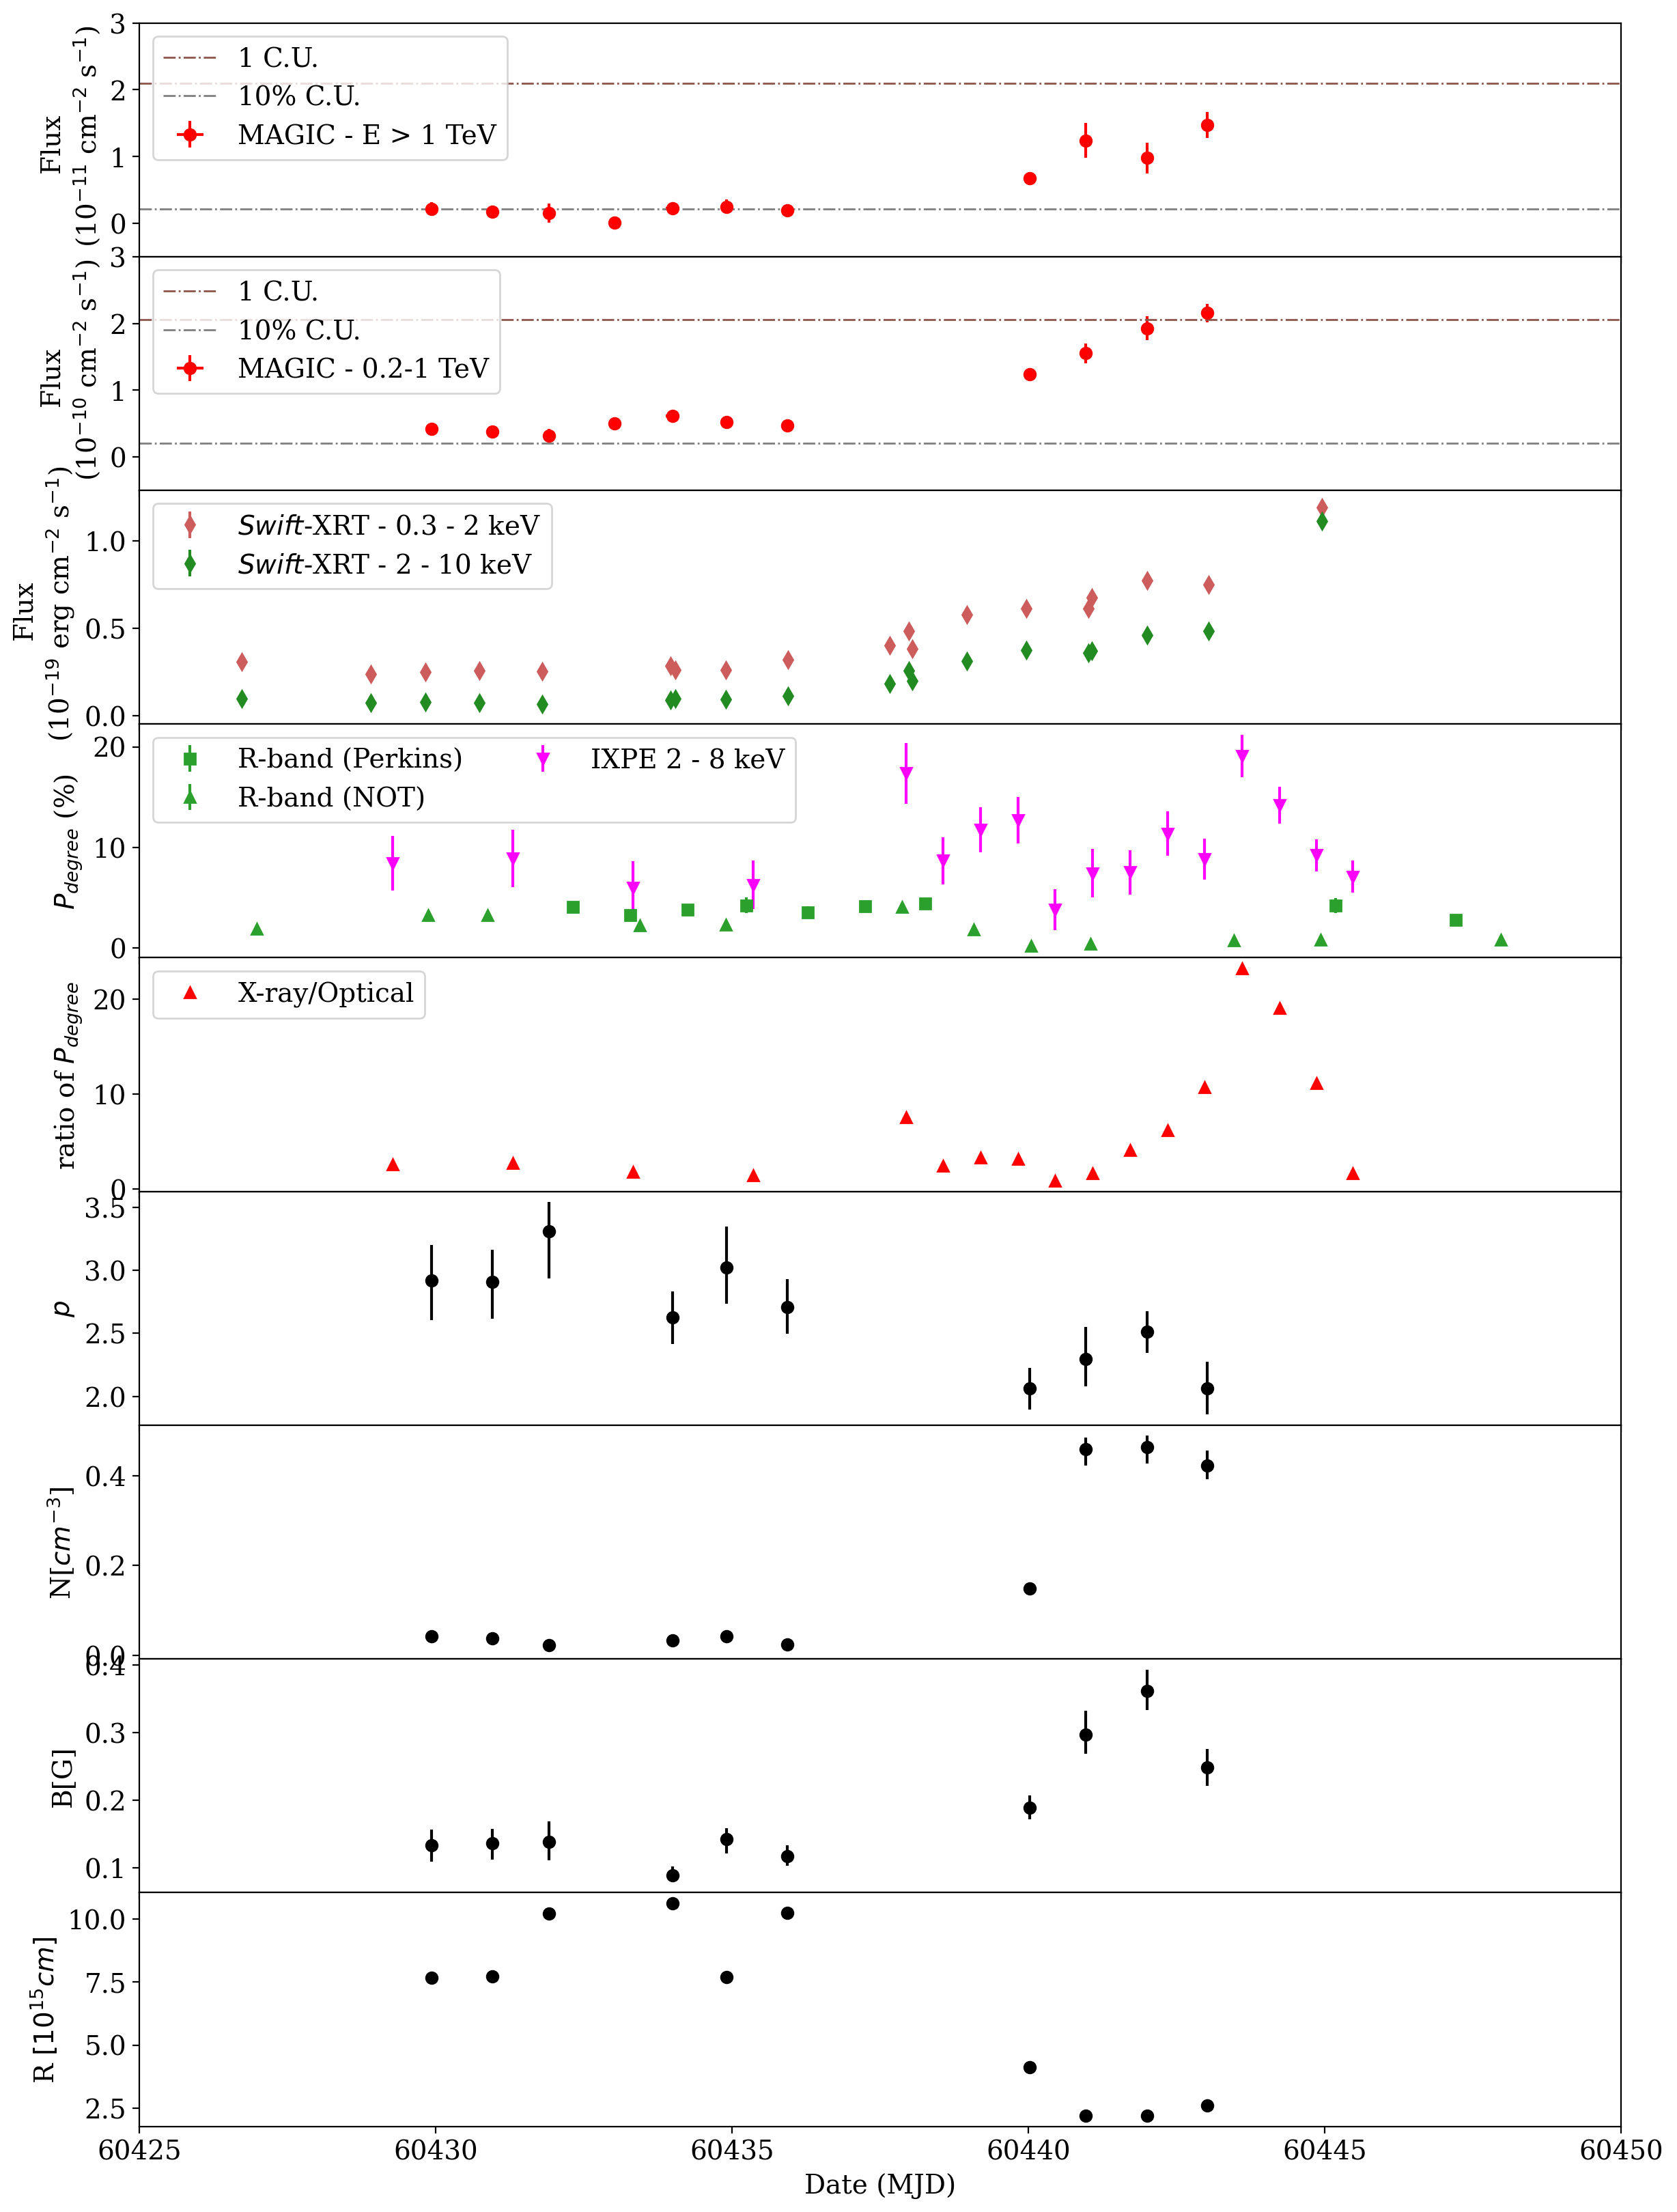

In [59]:
fig, axs = plt.subplots(9, 1, figsize=(14,20), sharex=True)
fig.subplots_adjust(hspace=0.00)
#########################################################
#MAGIC - E > 1 TeV
axs[0].errorbar(finalmjd1, finalflux1/10e-12, yerr=finalEflux1/10e-12, xerr=finalEmjd1, label="MAGIC - E > 1 TeV", fmt='o', color = 'red')
axs[0].axhline(y=2.097e-11/10e-12, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[0].axhline(y=2.097e-12/10e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
#axs[0].axvline(x=60428.75, color='r', linestyle='-.')
#axs[0].axvline(x=60445.75, color='r', linestyle='-.')
axs[0].set_ylim(-0.5, 3)
axs[0].set_ylabel('Flux \n (10$^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].set_xlim(60425, 60450)
axs[0].legend(loc='upper left')
#axs[0].set_title('Light Curve of Mrk 421')
#axs[1].grid(True)

#############################################
#MAGIC - 0.2 < E < 1 TeV 
axs[1].errorbar(final_mjd1, final_flux1/10e-11, yerr=final_Eflux1/10e-11, xerr=final_Emjd1, label="MAGIC - 0.2-1 TeV", fmt='o', color = 'red')
axs[1].axhline(y=20.56e-11/10e-11, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=1)
axs[1].axhline(y=20.56e-12/10e-11, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=1)
axs[1].set_ylim(-0.5, 3)
#axs[1].axvline(x=60428.75, color='r', linestyle='-.')
#axs[1].axvline(x=60445.75, color='r', linestyle='-.')
axs[1].set_ylabel('Flux \n (10$^{-10}$ cm$^{-2}$ s$^{-1}$)')
axs[1].set_xlim(60425, 60450)
axs[1].legend(loc='upper left')

##################################################
#SWIFT-XRT - 0.3Kev< E <2KeV and 2Kev< E <10KeV
axs[2].errorbar(MJD_1, 10**(midlog_flux_1)/10e-10, yerr=[(yerr_lower_1), (yerr_upper_1)], fmt='d', label = r'$\mathit{Swift}$-XRT - 0.3 - 2 keV', color = 'indianred')
axs[2].errorbar(MJD_2, 10**(midlog_flux_2)/10e-10, yerr=[(yerr_lower_2), (yerr_upper_2)], fmt='d', label = r'$\mathit{Swift}$-XRT - 2 - 10 keV', color = 'Forestgreen')
#axs[2].axvline(x=60428.75, color='r', linestyle='-.')
#axs[2].axvline(x=60445.75, color='r', linestyle='-.')
axs[2].set_ylabel('Flux \n (10$^{-19}$ erg cm$^{-2}$ s$^{-1}$)')
axs[2].set_xlim(60425, 60450)
axs[2].legend(loc='upper left')

axs[3].errorbar(pol_data_average['Perkins']['mjd_avrg'], pol_data_average['Perkins']['PD_avrg'], yerr= pol_data_average['Perkins']['ePD_avrg'], fmt = 's', label = 'R-band (Perkins)', color = 'C2')
axs[3].errorbar(pol_data_average['NOT']['mjd_avrg'], pol_data_average['NOT']['PD_avrg'], yerr= pol_data_average['NOT']['ePD_avrg'], fmt = '^', label = 'R-band (NOT)', color = 'C2')
axs[3].errorbar(ixpe_mjd, ixpe_PD*100, yerr= ixpe_ePD*100, fmt = 'v', label = 'IXPE 2 - 8 keV', color = 'magenta')
#axs[6].errorbar(rad_mjd, rad_PD, yerr = rad_ePD, fmt = 'o', label = 'radio', color = 'purple')
#axs[3].axvline(x=60428.75, color='r', linestyle='-.')
#axs[3].axvline(x=60445.75, color='r', linestyle='-.')
axs[3].set_ylabel('$P_{degree}$ (%)')
axs[3].set_xlim(60425, 60450)
axs[3].legend(loc='upper left', ncol=2)
#########################################################
axs[4].plot(ixpe_mjd, l3, '^', color='red', label = 'X-ray/Optical')
#axs3].plot(MJD_swift_xrt, l3, 'o')
axs[4].set_ylabel('ratio of $P_{degree}$')
axs[4].set_xlabel('Date (MJD)')
#axs[4].axvline(x=60428.75, color='r', linestyle='-.')
#axs[4].axvline(x=60445.75, color='r', linestyle='-.')
axs[4].legend(loc='upper left')

###########################################################
axs[5].errorbar(MJD_swift_xrt, P_par_value_mcmc, yerr=[P_lower_err_mcmc, P_upper_err_mcmc], fmt='o', color='black')
axs[5].set_ylabel('$p$')
#axs[5].axvline(x=60428.75, color='r', linestyle='-.')
#axs[5].axvline(x=60445.75, color='r', linestyle='-.')
#axs[5].legend(loc='upper left')
axs[6].errorbar(MJD_swift_xrt, N_par_value_mcmc, yerr=[N_lower_err_mcmc, N_upper_err_mcmc], fmt='o', color='black')
axs[6].set_ylabel('N[$cm^{-3}$]')
#axs[6].axvline(x=60428.75, color='r', linestyle='-.')
#axs[6].axvline(x=60445.75, color='r', linestyle='-.')
#axs[6].legend(loc='upper left')
axs[7].errorbar(MJD_swift_xrt, B_par_value_mcmc, yerr=[B_lower_err_mcmc, B_upper_err_mcmc], fmt='o', color='black')
axs[7].set_ylabel('B[G]')
#axs[7].axvline(x=60428.75, color='r', linestyle='-.')
#axs[7].axvline(x=60445.75, color='r', linestyle='-.')
#axs[7].legend(loc='upper left')
axs[8].errorbar(MJD_swift_xrt, compact_R/1e15, fmt='o', color='black')
axs[8].set_ylabel('R $[10^{15}  cm]$')
#axs[8].axvline(x=60428.75, color='r', linestyle='-.')
#axs[8].axvline(x=60445.75, color='r', linestyle='-.')
#axs[8].legend(loc='upper left')
axs[8].set_xlabel('Date (MJD)')
plt.savefig('ratio_pol_degree.png')
#, label='Radius', label='spectral index' label='Number density of electrons'label='Magnetic field'

## compact zone radius calculation

In [51]:
PD_opt_xray = np.array([3.23813925, 3.26982556, 3.27689521, 4.22795715, 2.29950602, 3.5136979, 3.5136979, 4.02754116, 4.3819582, 1.83142349, 1.83142349, 0.42024653, 0.42024653, 0.42024653, 0.42024653, 0.7437806, 0.7437806, 0.82215014, 0.82215014, 4.17581358])

In [41]:
final_ixpe_PD = np.array([8.88303729, 8.88303729, 7.410851675, 5.93866606, 6.26541394, 6.26541394, 12.66037142, 7.4027867, 9.425165955, 8.82003842])

In [43]:
final_optical_PD = np.array([3.23813925, 3.26982556, 4.15801661, 3.53440069, 2.29950602, 3.52677952, 1.83142349, 0.42024653, 0.530593, 0.64094014])

In [45]:
final_NOT_PD = np.array([3.23813925, 3.26982556, 2.75736354, 1.7215214, 2.29950602, 3.16352359, 1.83142349, 0.42024653, 0.530593, 0.64094014])

In [47]:
final_Perkins_PD = np.array([3.81501054, 3.81501054, 4.03649903, 3.77493925, 4.22795715, 3.5136979, 3.81501054, 3.81501054, 3.81501054, 3.81501054])

In [49]:
final_ixpe_PD/final_NOT_PD
MJD_swift_xrt=np.array([60429.92016886, 60430.95138023, 60431.90237578, 60433.99252742, 60434.90061434, 60435.92343486, 60440.01963832, 60440.96556404, 60441.99787484, 60443.01454012])

In [55]:
l = final_ixpe_PD/final_Perkins_PD
l2 = final_ixpe_PD/final_NOT_PD
#l3 = final_ixpe_PD/final_optical_PD
l3 = ixpe_PD*100/PD_opt_xray

In [59]:
alpha = 1.2*np.pi/180
d_JB = np.min(R_compact2)/(2*np.tan(alpha/2))
print(d_JB/3.086e18)

0.03408807851981765


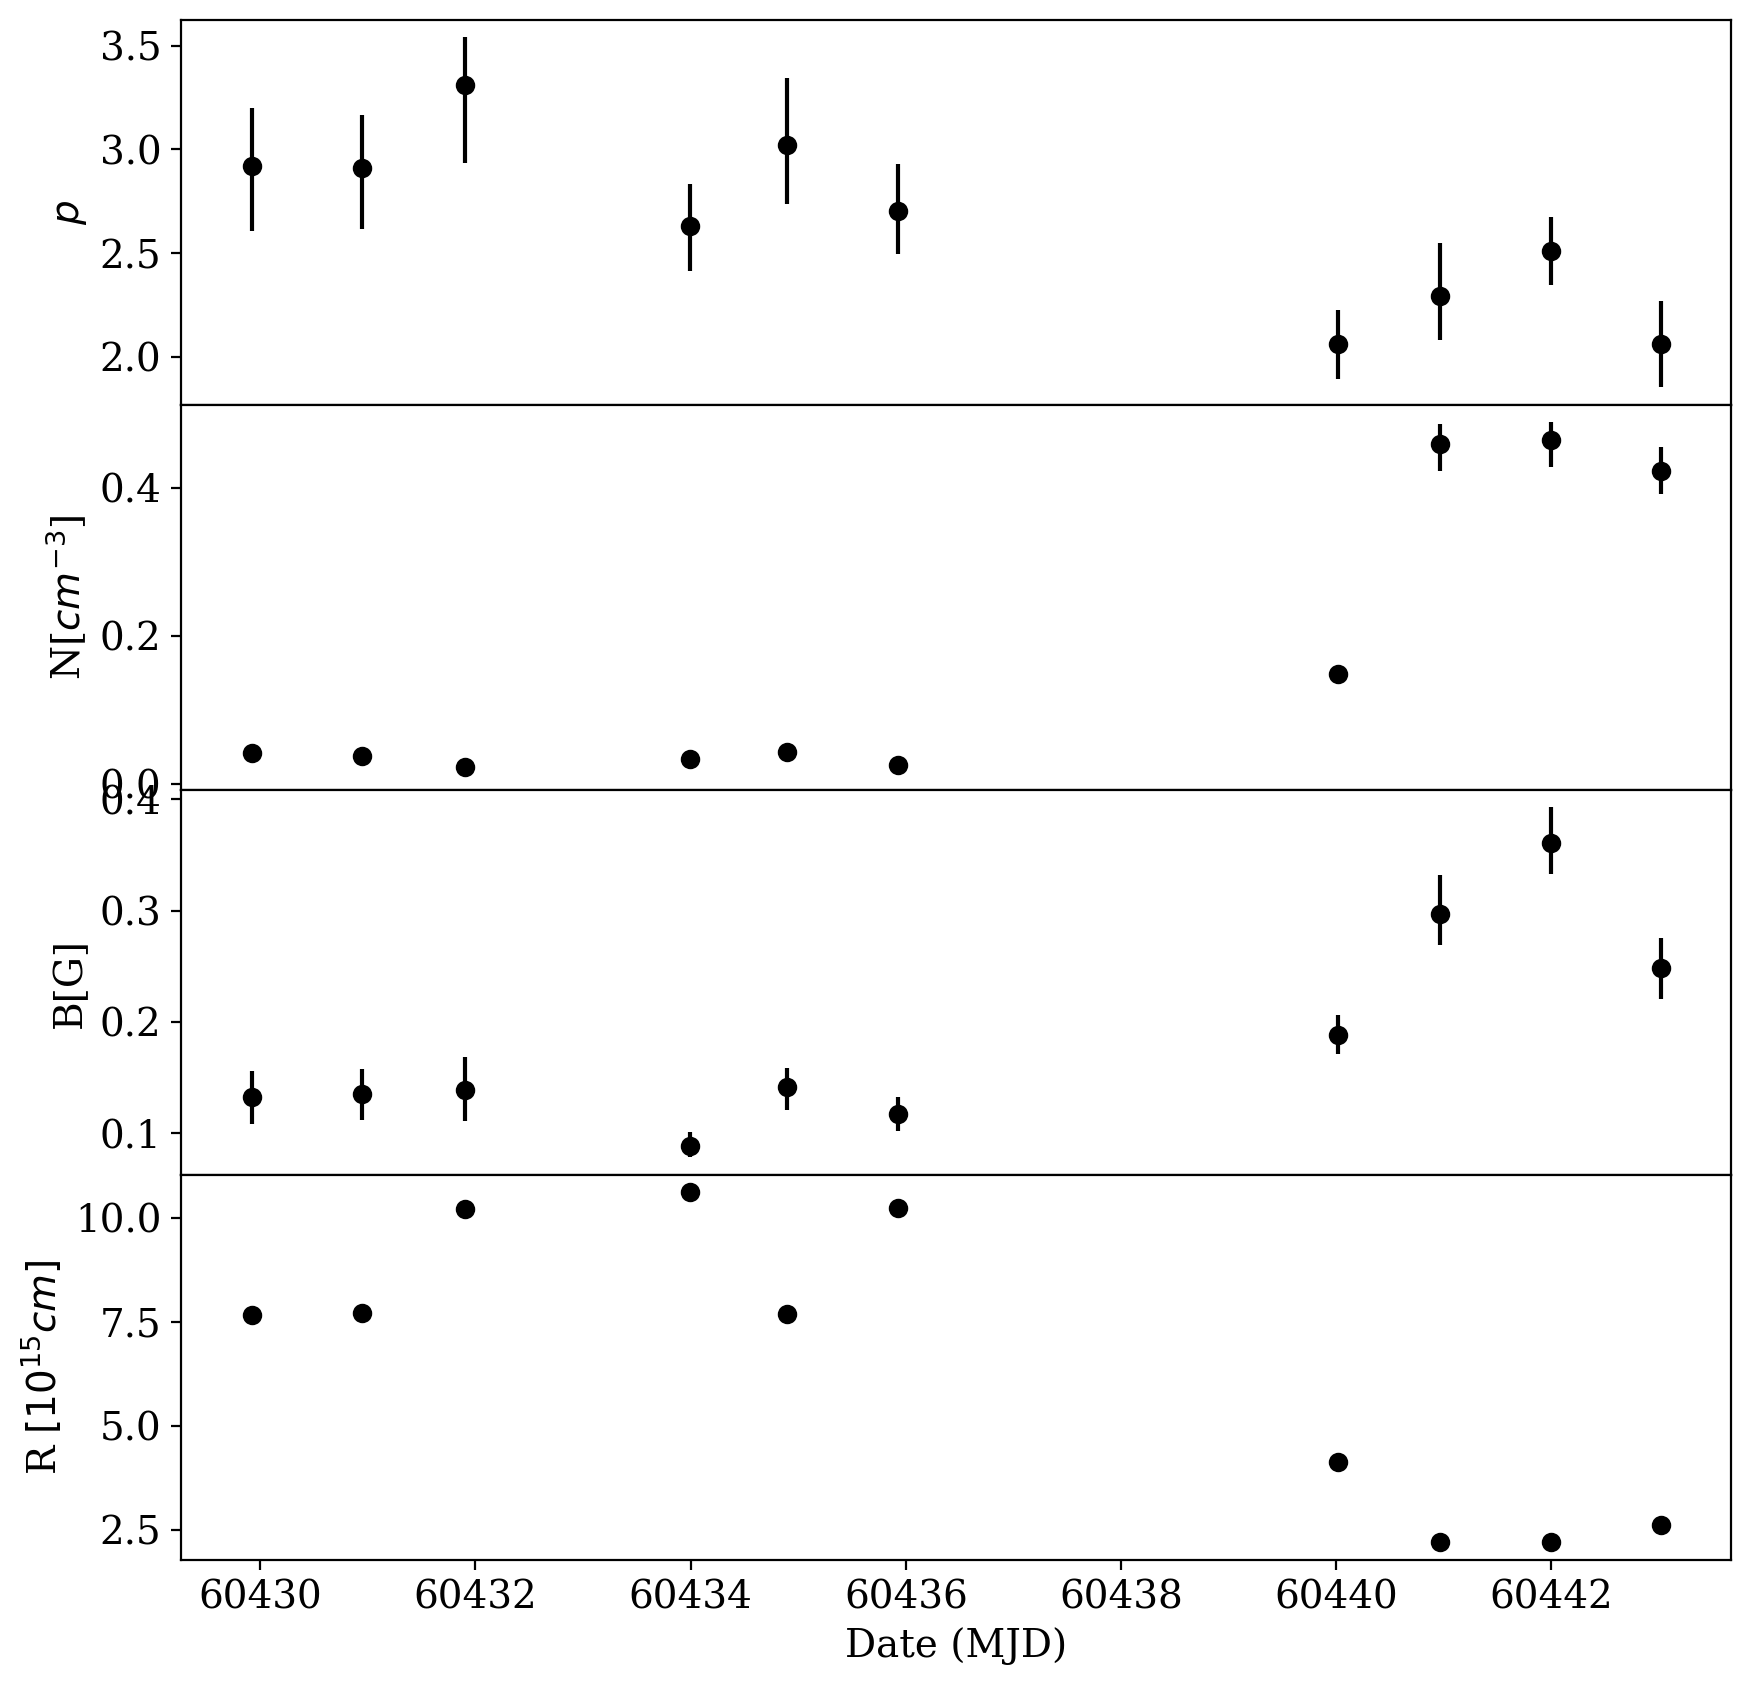

In [69]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.00)
axs[0].errorbar(MJD_swift_xrt, P_par_value_mcmc, yerr=[P_lower_err_mcmc, P_upper_err_mcmc], fmt='o', color='black')
axs[0].set_ylabel('$p$')
#axs[5].axvline(x=60428.75, color='r', linestyle='-.')
#axs[5].axvline(x=60445.75, color='r', linestyle='-.')
#axs[5].legend(loc='upper left')
axs[1].errorbar(MJD_swift_xrt, N_par_value_mcmc, yerr=[N_lower_err_mcmc, N_upper_err_mcmc], fmt='o', color='black')
axs[1].set_ylabel('N[$cm^{-3}$]')
#axs[6].axvline(x=60428.75, color='r', linestyle='-.')
#axs[6].axvline(x=60445.75, color='r', linestyle='-.')
#axs[6].legend(loc='upper left')
axs[2].errorbar(MJD_swift_xrt, B_par_value_mcmc, yerr=[B_lower_err_mcmc, B_upper_err_mcmc], fmt='o', color='black')
axs[2].set_ylabel('B[G]')
#axs[7].axvline(x=60428.75, color='r', linestyle='-.')
#axs[7].axvline(x=60445.75, color='r', linestyle='-.')
#axs[7].legend(loc='upper left')
axs[3].errorbar(MJD_swift_xrt, compact_R/1e15, fmt='o', color='black')
axs[3].set_ylabel('R $[10^{15}  cm]$')
#axs[8].axvline(x=60428.75, color='r', linestyle='-.')
#axs[8].axvline(x=60445.75, color='r', linestyle='-.')
#axs[8].legend(loc='upper left')
axs[3].set_xlabel('Date (MJD)')
plt.savefig('four_paras.png')